# <p style="background-color:#00008B;color:white;font-size:150%;text-align:center;border-radius:10px 10px;height:70px;padding-top: 20px;"> Tiktok vs Spodify Top Hits 2022</p>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import seaborn as sns

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] =14

# <p style="background-color:#00008B;color:white;font-size:100%;text-align:center;border-radius:10px 10px;">1. Cleaning Data</p>

In [4]:
dfs = pd.read_csv("datasets/spotify_top_charts_22.csv")
dft = pd.read_csv("datasets/TikTok_songs_2022.csv")
#dancibility, weeks on charts, artist_names, track_names, energy and instramentalness
spotify = dfs[["artist_names", "track_name", "weeks_on_chart", "danceability", "energy", "instrumentalness"]].dropna()
tiktok = dfs[["artist_names", "track_name", "weeks_on_chart", "danceability", "energy", "instrumentalness"]].dropna()
#646 x 6 on both
#I believe that is all there is not much to take out of the data 

# <p style="background-color:#00008B;color:white;font-size:100%;text-align:center;border-radius:10px 10px;">1. Exploratory Data Analysis</p>

In [5]:
df_spodify = pd.read_csv("datasets/spotify_top_charts_22.csv")
print("There are {} Spodify songs and {} fields.".format(df_spodify.shape[0],df_spodify.shape[1]))
df_spodify.head()

There are 646 Spodify songs and 17 fields.


,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602


In [6]:
df_tiktok = pd.read_csv("datasets/TikTok_songs_2022.csv")
print("There are {} TikTok songs and {} fields.".format(df_tiktok.shape[0],df_tiktok.shape[1]))
df_tiktok.head()

There are 263 TikTok songs and 18 fields.


,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


> 📌Since there is 646 Spodify songs and 263 TikTok songs, we will take the top 200 from each. The Spodify dataset uses weeks_on_chart to measure populatiry where as the TikTok dataset uses track_pop. 

In [8]:
selected_spodify = df_spodify.sort_values(by="weeks_on_chart", ascending=False)[:200]
selected_tiktok = df_tiktok.sort_values(by="track_pop", ascending=False)[:200]

---
### What are the most popular tracks?

In [9]:
selected_spodify.head(5)

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
139,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,Shape of You,1,269,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.0,0.0931,95.977,4,233713
198,spotify:track:5uCax9HTNlzGybIStD3vDh,James Arthur,Say You Won't Let Go,7,268,0.358,0.557,10,-7.398,1,0.0590,0.6950,0.0,0.0902,85.043,4,211467
91,spotify:track:0pqnGHJpmpxLKifKRmU6WP,Imagine Dragons,Believer,16,268,0.776,0.780,10,-4.374,0,0.1280,0.0622,0.0,0.0810,124.949,4,204347
150,spotify:track:0tgVpDi06FyKpA1z0VMD4v,Ed Sheeran,Perfect,4,262,0.599,0.448,8,-6.312,1,0.0232,0.1630,0.0,0.1060,95.050,3,263400
397,spotify:track:6gBFPUFcJLzWGx4lenP6h2,Travis Scott,goosebumps,13,226,0.841,0.728,7,-3.370,1,0.0484,0.0847,0.0,0.1490,130.049,4,243837


In [10]:
selected_tiktok.head(5)

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
5,Glimpse of Us,Joji,85,Glimpse of Us,97,0.440,0.317,-9.258,1,8,0.0531,0.891000,0.000005,0.1410,0.268,169.914,3,233456
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342000,0.001010,0.3110,0.662,173.930,4,167303
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720000,0.003140,0.0604,0.197,108.375,4,298933
52,Late Night Talking,Harry Styles,91,Harry's House,93,0.714,0.728,-4.595,1,10,0.0468,0.298000,0.000000,0.1060,0.901,114.996,4,177955
260,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365


---
### How do the different mood descriptions of the track influence the popularity?

<AxesSubplot:title={'center':'Mood descriptions influence on Spodify Song Popularity'}>

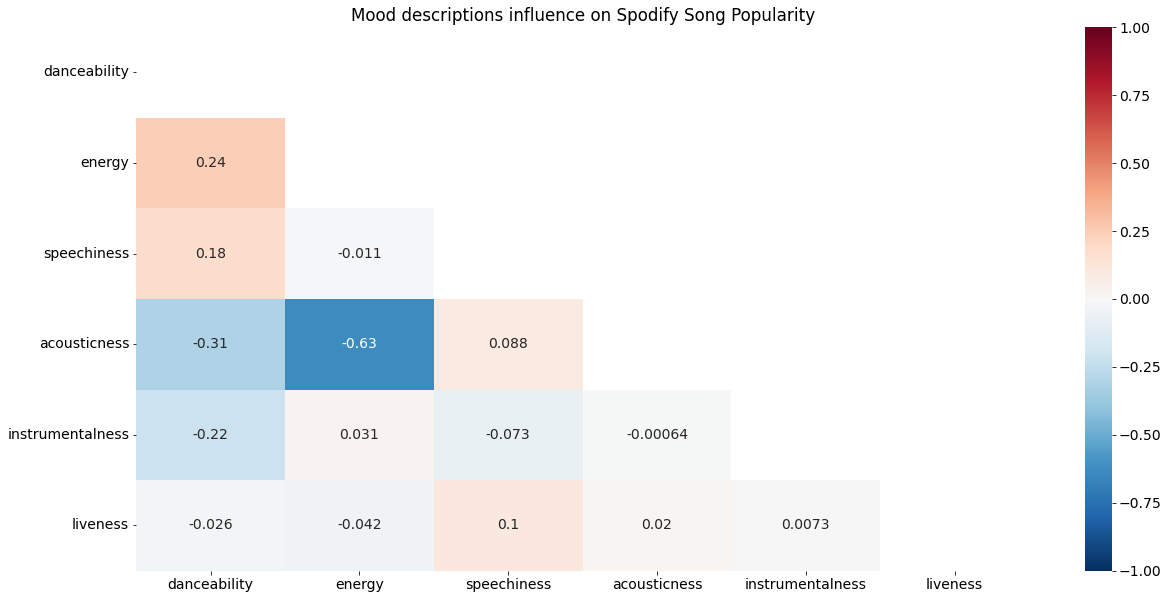

In [11]:
columns_mood = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness"]
mask = np.triu(np.ones_like(selected_spodify[columns_mood].corr(), dtype=bool))

plt.title("Mood descriptions influence on Spodify Song Popularity")
sns.heatmap(selected_spodify[columns_mood].corr(), data = selected_spodify[columns_mood], mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

<AxesSubplot:title={'center':'Mood descriptions influence on TikTok Song Popularity'}>

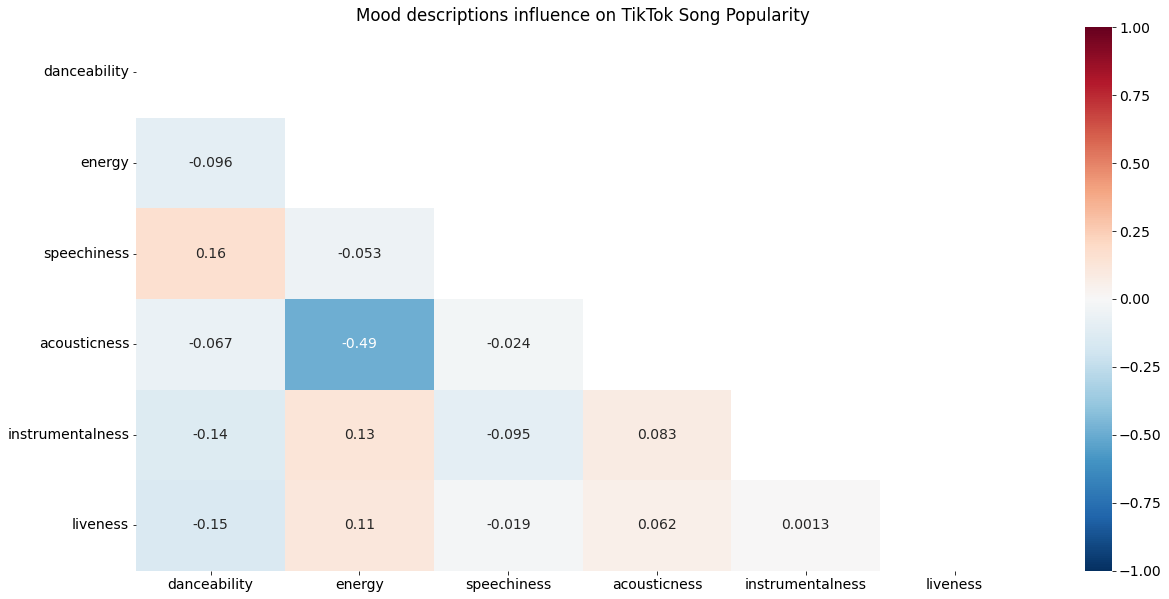

In [12]:
columns_mood = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness"]
mask = np.triu(np.ones_like(selected_tiktok[columns_mood].corr(), dtype=bool))

plt.title("Mood descriptions influence on TikTok Song Popularity")
sns.heatmap(selected_tiktok[columns_mood].corr(), data = selected_tiktok[columns_mood], mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')